In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv("veriler.csv")
df = data.copy()
df.head()
X = df.drop(["cinsiyet","ulke"],axis=1)
y = df[["cinsiyet"]]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.34,random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(x_train)  
X_test = ss.fit_transform(x_test)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ulke      22 non-null     object
 1   boy       22 non-null     int64 
 2   kilo      22 non-null     int64 
 3   yas       22 non-null     int64 
 4   cinsiyet  22 non-null     object
dtypes: int64(3), object(2)
memory usage: 1008.0+ bytes


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3,metric="minkowski")
model  = knn.fit(X_train,y_train)
y_pred = model.predict(X_train)
acs_train = accuracy_score(y_train,y_pred)
print(acs_train)
print(confusion_matrix(y_train,y_pred))

0.9285714285714286
[[6 1]
 [0 7]]


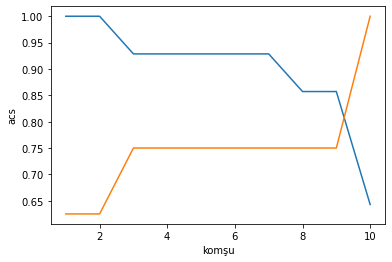

In [30]:
import matplotlib.pyplot as plt
neighbor = list(range(1,11))
acs = []
acs_test = []
for i in range(1,11):
   knn = KNeighborsClassifier(n_neighbors=i,metric="minkowski")
   model  = knn.fit(X_train,y_train)
   y_pred = model.predict(X_train)
   y_test1 = model.predict(X_test)
   acs_train = accuracy_score(y_train,y_pred)
   acs_test1 = accuracy_score(y_test1,y_test)
   acs.append(acs_train)
   acs_test.append(acs_test1) 
plt.plot(neighbor,acs)
plt.plot(neighbor,acs_test)
plt.figure
plt.xlabel("komşu")
plt.ylabel("acs");

In [29]:
acs_test

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]